# Whatsapp chat analysis

Importiamo delle librerie che ci serviranno:

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

Il comando _%matplotlib inline_ ci permette di visualizzare i plot all'interno del notebook.

Salviamo in una variabile il nome del documento da esaminare:

In [2]:
text = "fantacalcio.txt"

## Lettura dell'input

Considerando la forma dei messaggi che abbiamo all'interno del documento, possiamo scrivere una funzione che legga ogni riga e ci restituisca in output i vari campi che ci interessano (in questo caso data, ora, mittente e messaggio):

In [3]:
def process(msg, verbose=False):
    """
    A function to process messages in the chat.
    Example message: '05/12/2015, 19:43 - Umberto: Date un segnale'
    Input: msg     - str, message to process
           verbose - boolean, if True then print messages
    """
    n = 2
    groups = msg.split(':')     # splittiamo il messaggio in corrispondenza di ':'
    if verbose:
        print("groups after msg.split(':'): \n", groups)
    groups = ':'.join(groups[:n]), ':'.join(groups[n:])
    fields = groups[0].split()  # splittiamo la prima stringa in groups in corripondenza di ogni spazio
    if verbose:
        print("groups after .join: \n", groups)
        print("fields: \n", fields)
    try:
        date = fields[0].replace(',','')
        hour = fields[1]
        sender = ' '.join(fields[3:])
        msg = groups[1].lower().strip()
        if len(msg) > 0:
            if verbose:
                print([date, hour, sender, msg])
            return date, hour, sender, msg
    except Exception as e:
        if verbose:
            print(e)
            print(msg)

Vediamo ad esempio cosa restituisce _process_ con 2 diversi messaggi:

In [4]:
msg = '05/12/2015, 19:43 - Umberto: Date un segnale'
process(msg, verbose=True)

groups after msg.split(':'): 
 ['05/12/2015, 19', '43 - Umberto', ' Date un segnale']
groups after .join: 
 ('05/12/2015, 19:43 - Umberto', ' Date un segnale')
fields: 
 ['05/12/2015,', '19:43', '-', 'Umberto']
['05/12/2015', '19:43', 'Umberto', 'date un segnale']


('05/12/2015', '19:43', 'Umberto', 'date un segnale')

In [5]:
msg = '08/09/16, 14:08 - Ennio ha creato il gruppo “Fantastico”'
process(msg, verbose=True)

groups after msg.split(':'): 
 ['08/09/16, 14', '08 - Ennio ha creato il gruppo “Fantastico”']
groups after .join: 
 ('08/09/16, 14:08 - Ennio ha creato il gruppo “Fantastico”', '')
fields: 
 ['08/09/16,', '14:08', '-', 'Ennio', 'ha', 'creato', 'il', 'gruppo', '“Fantastico”']


Possiamo quindi leggere l'intero documento:

In [6]:
strings = []
with open(text) as chat:
    for i, msg in enumerate(chat):
        try:
            (date, hour, sender, msg) = process(msg)
            strings.append([date, hour, sender, msg])
        except Exception as e:
            # print(e)
            # print(msg)
            continue
    
print(strings[:5])

[['08/09/16', '14:08', 'Ennio', 'dato che pier on si muove'], ['08/09/16', '14:08', 'Ennio', 'io ho creato il gruppo'], ['08/09/16', '14:08', 'Ennio', ':)'], ['08/09/16', '14:08', 'Ennio', 'marco ha creato la competizione e caricato tutte le squadre'], ['08/09/16', '14:09', 'Riccardo', 'ho visto']]


## Lettura dell'input usando regex

In realtà, c'è un modo più veloce per poter leggere le righe che ci interessano all'interno del file, ovvero usando una __regular expression__ (https://en.wikipedia.org/wiki/Regular_expression), una sequenza di caratteri che definisce un pattern:

In [7]:
import re

f = open(text)
rows = re.findall('(\d{2}\/\d{2}\/\d{2})(?:, )(\d{2}:\d{2})(?: - )([a-zA-Z0-9_ ]+)(?:: )(.*)', f.read())
len(rows)

14020

In [8]:
rows[:5]

[('08/09/16', '14:08', 'Ennio', 'Dato che Pier on si muove'),
 ('08/09/16', '14:08', 'Ennio', 'Io ho creato il gruppo'),
 ('08/09/16', '14:08', 'Ennio', ':)'),
 ('08/09/16',
  '14:08',
  'Ennio',
  'Marco ha creato la competizione e caricato tutte le squadre'),
 ('08/09/16', '14:09', 'Riccardo', 'Ho visto')]

Per saperne di più sulle regular expression: https://docs.python.org/3/library/re.html

## Pandas

Una volta letto il file della chat, possiamo trasformarlo in un dataframe di Pandas. Come vedremo, diverse operazioni di manipolazione dei dati sono facilmente eseguibili in Pandas:

In [9]:
df = pd.DataFrame(strings) # convertiamo tutto in un dataframe           
df.columns = ['date',
              'time',
              'sender',
              'message']   # rinomiamo le colonne
df.head()                  # mostra le prime 5 righe del dataframe

,date,time,sender,message
0,08/09/16,14:08,Ennio,dato che pier on si muove
1,08/09/16,14:08,Ennio,io ho creato il gruppo
2,08/09/16,14:08,Ennio,:)
3,08/09/16,14:08,Ennio,marco ha creato la competizione e caricato tut...
4,08/09/16,14:09,Riccardo,ho visto


Per avere una descrizione del dataset possiamo usare il comando _info_:

In [10]:
help(pd.DataFrame.info)

Help on function info in module pandas.core.frame:

info(self, verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)
    Concise summary of a DataFrame.
    
    Parameters
    ----------
    verbose : {None, True, False}, optional
        Whether to print the full summary.
        None follows the `display.max_info_columns` setting.
        True or False overrides the `display.max_info_columns` setting.
    buf : writable buffer, defaults to sys.stdout
    max_cols : int, default None
        Determines whether full summary or short summary is printed.
        None follows the `display.max_info_columns` setting.
    memory_usage : boolean/string, default None
        Specifies whether total memory usage of the DataFrame
        elements (including index) should be displayed. None follows
        the `display.memory_usage` setting. True or False overrides
        the `display.memory_usage` setting. A value of 'deep' is equivalent
        of True, with deep introsp

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14794 entries, 0 to 14793
Data columns (total 4 columns):
date       14794 non-null object
time       14794 non-null object
sender     14794 non-null object
message    14794 non-null object
dtypes: object(4)
memory usage: 462.4+ KB


Dal momento che ci servirà in seguito, trasformiamo il formato della colonna _date_ da stringa in _datetime_:

In [12]:
df['date'] = df['date'].apply(pd.to_datetime)  # applichiamo la funzione ad un'intera colonna
df.head(10)                                    # possiamo specificare il numero di righe da mostrare

,date,time,sender,message
0,2016-08-09,14:08,Ennio,dato che pier on si muove
1,2016-08-09,14:08,Ennio,io ho creato il gruppo
2,2016-08-09,14:08,Ennio,:)
3,2016-08-09,14:08,Ennio,marco ha creato la competizione e caricato tut...
4,2016-08-09,14:09,Riccardo,ho visto
5,2016-08-09,14:09,Fabrizio,ma non facciamo un torneo a fifa con rl squadr...
6,2016-08-09,14:10,Riccardo,ahahah minimo
7,2016-08-09,14:22,Marco,"date un'occhiata ai giocatori e ai prezzi, cre..."
8,2016-08-09,14:31,Ennio,hahha
9,2016-08-09,14:34,Marco,ma per la panchina dobbiamo mettere un limiti ...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14794 entries, 0 to 14793
Data columns (total 4 columns):
date       14794 non-null datetime64[ns]
time       14794 non-null object
sender     14794 non-null object
message    14794 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 462.4+ KB


Controlliamo quali siano i mittenti all'interno della chat, usando il comando _unique_:

In [14]:
help(pd.Series.unique)

Help on function unique in module pandas.core.series:

unique(self)
    Return unique values in the object. Uniques are returned in order
    of appearance, this does NOT sort. Hash table-based unique.
    
    Parameters
    ----------
    values : 1d array-like
    
    Returns
    -------
    unique values.
      - If the input is an Index, the return is an Index
      - If the input is a Categorical dtype, the return is a Categorical
      - If the input is a Series/ndarray, the return will be an ndarray
    
    See Also
    --------
    unique
    Index.unique
    Series.unique



In [15]:
df['sender'].unique()

array(['Ennio', 'Riccardo', 'Fabrizio', 'Marco', 'Giova', 'Piero',
       '\u202a+44 7873 907466\u202c', 'Gato',
       '\u202a+39 347 214 0944\u202c', 'Mirko', 'Nicolo', 'Raffaele'], dtype=object)

Rimuoviamo i numeri di telefono sconosciuti:

In [16]:
df = df[df['sender'].str.isalpha()]  # controlliamo che il campo sender sia fatto di soli valori alfabetici

In [17]:
df['sender'].unique()

array(['Ennio', 'Riccardo', 'Fabrizio', 'Marco', 'Giova', 'Piero', 'Gato',
       'Mirko', 'Nicolo', 'Raffaele'], dtype=object)

In [18]:
df.shape

(14020, 4)

## Response Matrix

Una volta che abbiamo i dati, possiamo creare una matrice (quadrata) che rappresenti gli scambi di messaggi all'interno della chat. Assumiamo, banalmente, che un messaggio inviato rappresenti una risposta ad un messaggio precedente, se appartenente ad una diversa persona. Esempio:

    - Tizio:     Ciao, sono Tizio.
    - Caio:      Ciao Tizio, io sono Caio!
    - Sempronio: Ciao a tutti, ci sono anche io.

In questo caso assumiamo che Caio fornisca una risposta a Tizio e Sempronio una rispota a Caio. La matrice sarà quindi la seguente:

$$ \left\lgroup \matrix{0 & 0 & 0\cr 1 & 0 & 0\cr 0 & 1 & 0} \right\rgroup $$

Dove la prima riga rappresenta i messaggi mandati da Tizio rispettivamente a se stesso (0), Caio (0) e Sempronio (0). In modo simile per le altre righe. In particolare, questa matrice avrà tutti 0 sulla diagonale (assumiamo che una persona non risponda a se stessa).

Proviamo a scrivere una funzione che calcoli questa matrice. Dal momento che non possiamo indicizzare le righe (o le colonne) di una matrice usando stringhe (in questo caso i nomi dei mittenti), effettuiamo prima una conversione dei nomi in numeri, utilizzando la libreria _sklearn_ (http://scikit-learn.org/stable/index.html): 

In [19]:
from sklearn.preprocessing import LabelEncoder

help(LabelEncoder.fit_transform)

Help on function fit_transform in module sklearn.preprocessing.label:

fit_transform(self, y)
    Fit label encoder and return encoded labels
    
    Parameters
    ----------
    y : array-like of shape [n_samples]
        Target values.
    
    Returns
    -------
    y : array-like of shape [n_samples]



In [20]:
import numpy as np

def responses(df):
    le = LabelEncoder()                                 # inizializziamo il label encoder
    df["sender_code"] = le.fit_transform(df["sender"])  # creiamo una nuova colonna nel dataframe
    names = list(df["sender"].unique())                 # salviamo i nomi dei mittenti in una lista
    n = len(names)                                      # n è il numero di mittenti
    resp_matrix = np.zeros((n, n), dtype=int)           # inizializziamo la matrice (tutti 0)
    for i, j in zip(df["sender_code"], df["sender_code"][1:]):  # scorriamo la colonna creata
        if i != j:
            resp_matrix[j, i] += 1
    return resp_matrix, le

Per conoscere a quali label sono stati assegnati i vari nomi, possiamo usare un altro metodo del _label encoder_:

In [21]:
help(LabelEncoder.inverse_transform)

Help on function inverse_transform in module sklearn.preprocessing.label:

inverse_transform(self, y)
    Transform labels back to original encoding.
    
    Parameters
    ----------
    y : numpy array of shape [n_samples]
        Target values.
    
    Returns
    -------
    y : numpy array of shape [n_samples]



Costruiamo quindi la matrice per il nostro dataset.

__Nota__: il label encoder in output dalla funzione ci serve per capire a quali nomi sono state associate le label!

In [22]:
mat, le = responses(df)
labels = le.inverse_transform(range(10))
print(labels)
print(mat)

['Ennio' 'Fabrizio' 'Gato' 'Giova' 'Marco' 'Mirko' 'Nicolo' 'Piero'
 'Raffaele' 'Riccardo']
[[  0 320  41 175 496  37 192 220  38  57]
 [324   0   6 144 292  13 163 242  22  52]
 [ 34  11   0   7  43   2  26   2   2   2]
 [194 131  12   0 222  14  62  94  12  21]
 [516 307  31 225   0  38 212 327  43 125]
 [ 28  17   4  10  45   0   0  26   3   2]
 [200 166  23  67 217   2   0 112  13   3]
 [181 245   5 102 330  23 126   0  10 103]
 [ 46  13   5   7  46   1  15  10   0   0]
 [ 54  48   2  25 133   5   6  92   0   0]]


Proviamo a fare un plot per visualizzare questi numeri:

In [23]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

### Da _tutti_ a _uno_ - colonne

Per visualizzare da chi riceve più spesso messaggi una persona è sufficiente fare un plot della colonna corrispondente a quella persona:

[320   0  11 131 307  17 166 245  13  48]


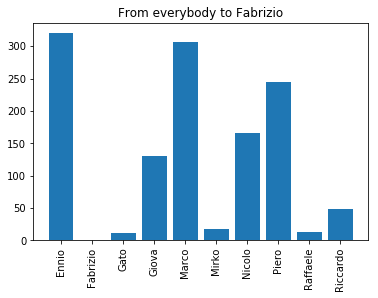

In [24]:
x = np.arange(len(df['sender'].unique()))    # definiamo l'asse delle x
print(mat[:, 1])
plt.bar(x, mat[:, 1])                        # disegna le barre sul plot
plt.xticks(x, le.inverse_transform(x), rotation="vertical")  # modifica l'asse delle x
plt.title("From everybody to Fabrizio")      # assegna un titolo al plot
plt.show()                                   # mostra il plot

### Da _uno_ a _tutti_ - righe

Allo stesso modo, per visualizzare a chi manda più spesso messaggi una persona è sufficiente fare un plot della riga corrispondente a quella persona:

[324   0   6 144 292  13 163 242  22  52]


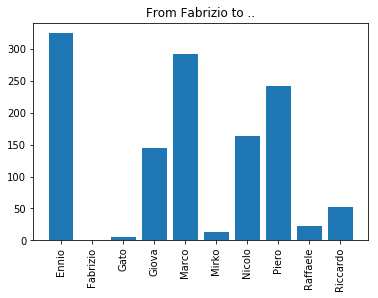

In [25]:
print(mat[1])
plt.bar(x, mat[1])
plt.xticks(x, le.inverse_transform(x), rotation="vertical")
plt.title("From Fabrizio to ..")
plt.show()

### Da _tutti_ a _uno_ in percentuali

Abbiamo visualizzato sopra il numero di messaggi in assoluto mandati o ricevuti da una singola persona. Potremmo pensare di vedere questi risultati in termini relativi, ad esempio normalizzando le colonne della matrice:

[[ 0.          0.25437202  0.31782946  0.22965879  0.27192982  0.27407407
   0.2394015   0.19555556  0.26573427  0.15616438]
 [ 0.20545339  0.          0.04651163  0.18897638  0.16008772  0.0962963
   0.2032419   0.21511111  0.15384615  0.14246575]
 [ 0.02155992  0.00874404  0.          0.00918635  0.02357456  0.01481481
   0.03241895  0.00177778  0.01398601  0.00547945]
 [ 0.12301839  0.10413355  0.09302326  0.          0.12171053  0.1037037
   0.07730673  0.08355556  0.08391608  0.05753425]
 [ 0.32720355  0.24403816  0.24031008  0.29527559  0.          0.28148148
   0.26433915  0.29066667  0.3006993   0.34246575]
 [ 0.01775523  0.01351351  0.03100775  0.01312336  0.02467105  0.          0.
   0.02311111  0.02097902  0.00547945]
 [ 0.12682308  0.13195548  0.17829457  0.08792651  0.1189693   0.01481481
   0.          0.09955556  0.09090909  0.00821918]
 [ 0.11477489  0.19475358  0.03875969  0.13385827  0.18092105  0.17037037
   0.15710723  0.          0.06993007  0.28219178]
 [ 0.02916

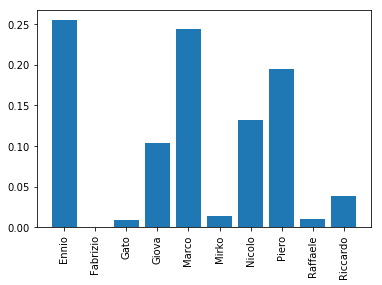

In [26]:
col_sum = np.sum(mat, axis=0)
normalized = mat / col_sum
print(normalized)

x = np.arange(len(df['sender'].unique()))
plt.bar(x, normalized[:, 1])
plt.xticks(x, le.inverse_transform(x), rotation="vertical")
plt.show()

Per visualizzare meglio le percentuali, possiamo utilizzare un diagramma a torta:

In [27]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, hold=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each
    wedge is given by ``x/sum(x)``.  If ``sum(x) <= 1``, then the
    values of x give the fractional area directly and the array
    will not be normalized.  The wedges are plotted
    counterclockwise, by default starting from the x-axis.
    
    Parameters
    ----------
    x : array-like
        The input array used to make the pie chart.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the
        fraction of the radius with which to offset each wedge.
    
    labels : list, optional, default: None
        A sequence of strings provid

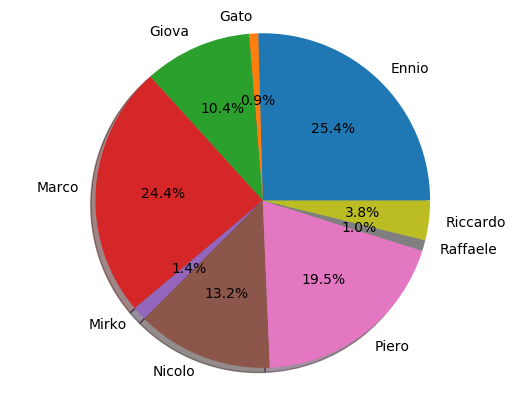

In [28]:
plt.rcdefaults()
labels = list(le.inverse_transform(range(10)))
labels.remove('Fabrizio')              # rimuoviamo il mittente
sizes = mat[np.arange(len(mat))!=1, 1] # selezioniamo tutti gli indici tranne il primo

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', radius=1,
        shadow=True)
plt.axis('equal')
plt.show()

### Da _uno_  a _tutti_ in percentuali

Come abbiamo visto usando _pie_ non c'è bisogno di calcolarsi le percentuali:

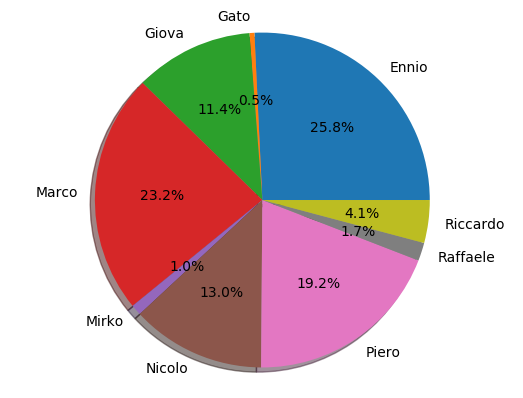

In [29]:
sizes = mat[1, np.arange(len(mat))!=1]  # selezioniamo tutti gli indici tranne il primo
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', radius=1,
        shadow=True)
plt.axis('equal')
plt.show()

## Messaggi per ora

Per raccogliere statistiche riguardo i vari campi possiamo usare la _groupby_: con questo comando aggreghiamo i dati in basi al campo specificato e possiamo procedere con altre diverse operazioni.

Ad esempio, volendo contare i messaggi in base all'ora aggreghiamo tutte le righe in base al campo 'time' e poi usiamo la funzione _count_.

In [30]:
help(pd.DataFrame.groupby)

Help on function groupby in module pandas.core.generic:

groupby(self, by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)
    Group series using mapper (dict or key function, apply given function
    to group, return result as series) or by a series of columns.
    
    Parameters
    ----------
    by : mapping, function, str, or iterable
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the
        values are used as-is determine the groups. A str or list of strs
        may be passed to group by the columns in ``self``
    axis : int, default 0
    level : int, level name, or sequence of such, default None
        If the axis is a MultiIndex (hierar

Prima di fare questa operazione però trasformiamo il campo 'time' in un formato che _Pandas_ comprende, il _datetime_

In [31]:
df['time'] = pd.to_datetime(df['time'])
msg_per_hour = df.groupby('time').count()
msg_per_hour.head()

,date,sender,message,sender_code
time,,,,
2018-05-04 00:00:00,13,13,13,13
2018-05-04 00:01:00,8,8,8,8
2018-05-04 00:02:00,6,6,6,6
2018-05-04 00:03:00,5,5,5,5
2018-05-04 00:04:00,4,4,4,4


Possiamo quindi produrre un plot da quanto appena ottenuto, usando il comando _plot_:

In [32]:
help(pd.DataFrame.plot)

Help on class FramePlotMethods in module pandas.plotting._core:

class FramePlotMethods(BasePlotMethods)
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fonts

Il comando _plt.xkcd()_ ci permette di usare lo stile _xkcd_ nei plot (https://en.wikipedia.org/wiki/Xkcd):

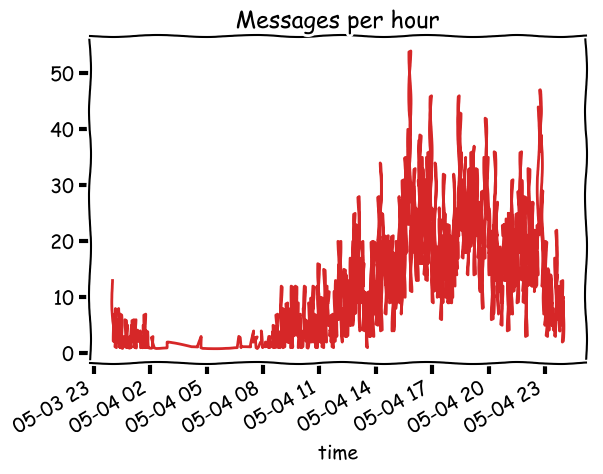

In [33]:
plt.xkcd()

msg_per_hour.plot(legend=None, title='Messages per hour')

## I più attivi

Per scoprire i più attivi sulla chat possiamo usare la funzione di _Pandas_ "value_counts":

In [34]:
help(pd.Series.value_counts)

Help on function value_counts in module pandas.core.base:

value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)
    Returns object containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : boolean, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : boolean, default True
        Sort by values
    ascending : boolean, default False
        Sort in ascending order
    bins : integer, optional
        Rather than count values, group them into half-open bins,
        a convenience for pd.cut, only works with numeric data
    dropna : boolean, default True
        Don't include counts of NaN.
    
    Returns
    -------
    counts : Series



In [35]:
most_actives = df['sender'].value_counts()
print(most_actives)

Ennio       2996
Marco       2878
Fabrizio    2503
Piero       1942
Nicolo      1464
Giova        861
Riccardo     719
Gato         239
Mirko        233
Raffaele     185
Name: sender, dtype: int64


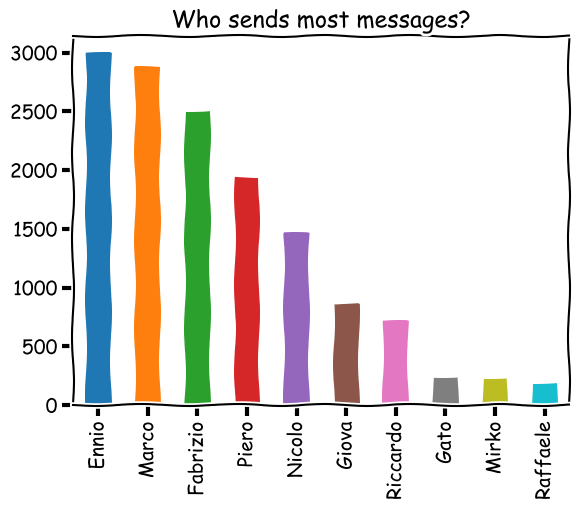

In [36]:
most_actives.plot(kind='bar', title='Who sends most messages?')
plt.show()

## Lunghezza dei messaggi

Possiamo aggiungere una colonna al dataframe che per ogni riga indichi la lunghezza del messaggio corrispondente.
Per fare ciò, dobbiamo applicare una funzione alla colonna messaggio per ogni riga:

In [37]:
def lunghezza_msg(riga):
    return len(riga['message'])

df['msg_len'] = df.apply(lunghezza_msg, axis=1)
df.head()

,date,time,sender,message,sender_code,msg_len
0,2016-08-09,2018-05-04 14:08:00,Ennio,dato che pier on si muove,0,25
1,2016-08-09,2018-05-04 14:08:00,Ennio,io ho creato il gruppo,0,22
2,2016-08-09,2018-05-04 14:08:00,Ennio,:),0,2
3,2016-08-09,2018-05-04 14:08:00,Ennio,marco ha creato la competizione e caricato tut...,0,59
4,2016-08-09,2018-05-04 14:09:00,Riccardo,ho visto,9,8


Una volta che abbiamo la nuova colonna, possiamo disegnare un istogramma che ci indichi la distribuzione dei valori in questa colonna:

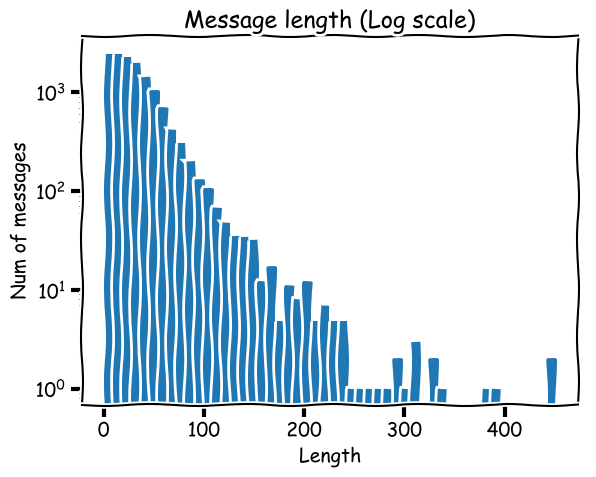

In [38]:
plt.hist(df.msg_len, bins=50, log=True)
plt.title("Message length (Log scale)")
plt.xlabel("Length")
plt.ylabel("Num of messages")
plt.show()

Come possiamo vedere (in scala logaritmica) la maggior parte dei messaggi tende ad essere breve (< 100 caratteri).

## Messaggi per data

Possiamo pensare di fare un plot che illustri il numero di messaggi mandati in base alla data:

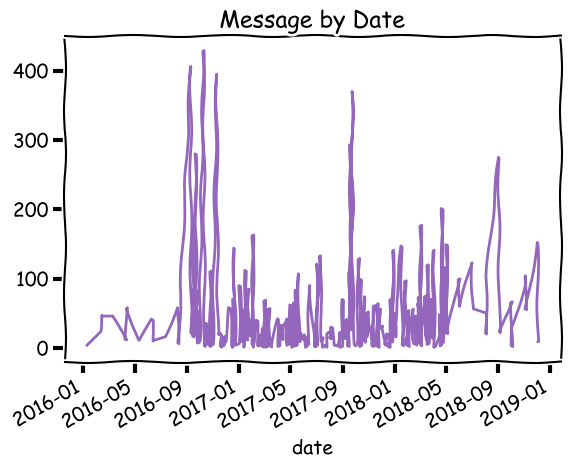

In [39]:
df.groupby('date').count().plot(legend=None, title='Message by Date')
plt.show()

Tuttavia questo plot non sembra essere tanto informativo..

## Messaggi per giorno della settimana

Per poter fare un plot del numero di messaggi in base al giorno della settimana, per prima cosa dalla data dobbiamo derivare il giorno. Per fortuna in _Pandas_ questo si può fare abbastanza facilmente:

In [40]:
help(pd.Series.dt.dayofweek)

Help on property:

    The day of the week with Monday=0, Sunday=6



In [41]:
df['weekday'] = df['date'].dt.dayofweek
df.head()

,date,time,sender,message,sender_code,msg_len,weekday
0,2016-08-09,2018-05-04 14:08:00,Ennio,dato che pier on si muove,0,25,1
1,2016-08-09,2018-05-04 14:08:00,Ennio,io ho creato il gruppo,0,22,1
2,2016-08-09,2018-05-04 14:08:00,Ennio,:),0,2,1
3,2016-08-09,2018-05-04 14:08:00,Ennio,marco ha creato la competizione e caricato tut...,0,59,1
4,2016-08-09,2018-05-04 14:09:00,Riccardo,ho visto,9,8,1


In maniera simile a quanto fatto precedentemente, tracciamo un plot:

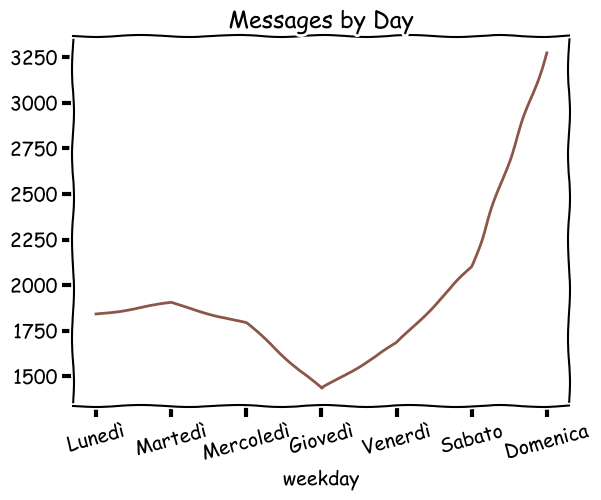

In [42]:
df.groupby('weekday').count().plot(legend=None, title='Messages by Day')
weekdays = ['Lunedì', 'Martedì', 'Mercoledì',
           'Giovedì', 'Venerdì', 'Sabato', 'Domenica']
plt.xticks(range(7), weekdays, rotation=15)
plt.show()

Possiamo considerare anche la distribuzione della lunghezza dei messaggi tenendo conto del giorno in cui questi sono stati inviati:

         sender_code    msg_len
weekday                        
0           3.718784  34.991857
1           3.417149  34.100999
2           3.902848  30.882189
3           3.433962  34.632425
4           3.493452  35.389881


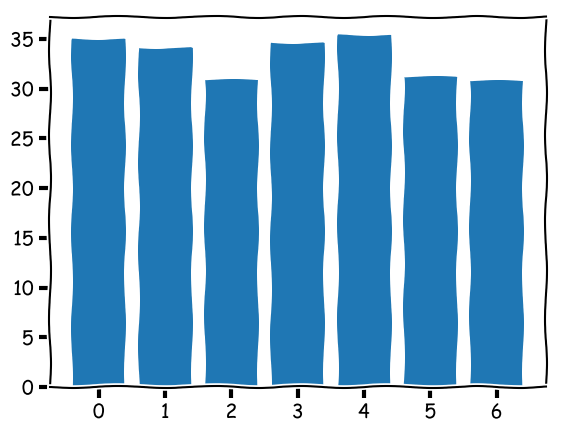

In [43]:
msg_per_day = df.groupby('weekday').mean()
print(msg_per_day.head())
plt.bar(range(7), msg_per_day['msg_len'])
plt.show()

## Le parole più frequenti

Usando invece quanto già visto nella lezione precedente, possiamo ottenere una distribuzione delle parole nella chat e scoprire quali siano le parole più comuni:

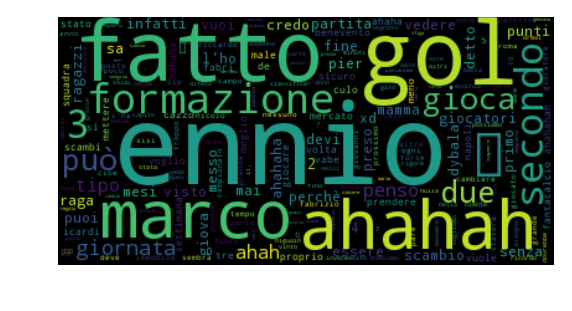

In [44]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

stopIt = stopwords.words('italian')
stopIt.append('<media')
stopIt.append('omitted>')
stopIt.append('omesso>')
to_remove = 'me no ok fa allora poi pure ora quindi ancora solo ce dopo comunque qualche ancora quando prima oh però qua più eh so mo é ah così vai bene vabbè vieni là tanto posso vado' 
avverbi = " di a da in con su per tra fra te domani piu vabbe oggi fare devo cosa sempre qualcuno andiamo vediamo manco po' c'è va almeno bo andare qui cmq già volete daje okok bho"
to_remove += avverbi
for i in to_remove.split():
    stopIt.append(i)

d = {}
for msg in df.message:
    words = msg.lower().split()
    for word in words:
        if word not in stopIt:
            try:
                d[word] += 1
            except:
                d[word] = 0

wordcloud=WordCloud().generate_from_frequencies(d)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()